## BBC News Categorization using Keras

In this notebook, I am going to train a model to categorize BBC news using embedding technique.

The dataset contains 5 news categories namely: business, entertainment, politics, sport, and tech. 

There are 2225 rows and 4 columns. However, only 2 columns (category and content) are used.
 
![](https://images.spot.im/v1/production/jyzxethffjsr6xwwz0ky)

*Image Source: Daily Express*

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from tensorflow import keras
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [ ]:
# read the csv file

# df = pd.read_csv("../input/bbcnewsarchive/bbc-news-data.csv", sep="\t")
df = pd.read_csv('../Translated/cleaned/train.csv')
test = pd.read_csv('../Translated/cleaned/test.csv')
trans = pd.read_csv('../Notebooks/corpus_translated.csv')
trans = trans.iloc[:,1]
# trans
df['Text'] = trans[:df.shape[0]]
test['Text'] = trans[df.shape[0]:]


print(df)

df["Label"].hist()

In [ ]:
# shuffle the dataframe to evenly distribute the labels

df = df.sample(frac=1).reset_index(drop=True)
df

In [ ]:
content = []
labels = []

for label in df.Label:
    labels.append(label)
    
for con in df.Text:
    for word in stopwords:
        token = " " + word + " "
        con = con.replace(token, " ")
        con = con.replace(" ", " ")
    content.append(con)

print(len(content))
print(len(labels))
print("\nContent:", content[0])
print("\nLabel:", labels[0])

In [ ]:
# split the dataset into training set and test set

train_content, test_content = content[:1000], content[1000:]
train_labels, test_labels = labels[:1000], labels[1000:]

train_content = np.array(train_content)
test_content = np.array(test_content)

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

print(len(train_content))
print(len(train_labels))
print(len(test_content))
print(len(test_labels))

In [ ]:
# check the distribution of labels in the training set and test set

unique_train_content, number_train_content = np.unique(train_labels, return_counts=True)

print("Training set labels:")
print(unique_train_content)
print(number_train_content)

unique_test_content, number_test_content = np.unique(test_labels, return_counts=True)

print("\nTest set labels:")
print(unique_test_content)
print(number_test_content)

In [ ]:
# tokenize the content

vocab_size = 10000
embedding_dim = 32
max_len = 200
trunc_type = "post"
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_content)

word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(train_content)
padded = pad_sequences(sequences, maxlen=max_len, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_content)
test_padded = pad_sequences(test_sequences, maxlen=max_len, truncating=trunc_type)

print(test_padded.shape)

In [30]:
# label_tokenizer.texts_to_sequences(train_labels)
# L = (label_tokenizer.texts_to_sequences(train_labels))

def unsstack(L):
    N = [np.array(item) for item in L]
    return np.array(N)

In [39]:
# tokenize the labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(labels)
label_sequences = le.transform(train_labels)
test_label_sequences = le.transform(test_labels)
# label_tokenizer = Tokenizer()
# label_tokenizer.fit_on_texts(labels)

# label_index = label_tokenizer.word_index

# label_sequences = unsstack(label_tokenizer.texts_to_sequences(train_labels))

# test_label_sequences = unsstack(label_tokenizer.texts_to_sequences(test_labels))

print(label_sequences.shape)
print(test_label_sequences.shape)

(1000,)
(436,)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 32)           320000    
_________________________________________________________________
global_average_pooling1d_5 ( (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               16896     
_________________________________________________________________
dense_11 (Dense)             (None, 20)                10260     
Total params: 347,156
Trainable params: 347,156
Non-trainable params: 0
_________________________________________________________________


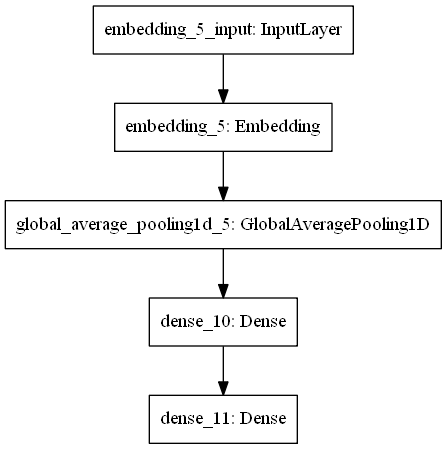

In [46]:
# define an NN model

model = keras.Sequential([layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
                        
                         layers.GlobalAveragePooling1D(), #simpler and faster than Flatten()
                         layers.Dense(512, activation="relu"),
                         layers.Dense(20, activation="softmax")])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()
keras.utils.plot_model(model)

In [47]:
padded

array([[3487, 3488,   58, ...,  115,   30,   41],
       [ 271,   38,   11, ...,  263,   42,   83],
       [ 797,  798,  320, ...,  320,    3,  942],
       ...,
       [ 287,  420,  211, ...,   75,    1, 1615],
       [   0,    0,    0, ..., 1688,  397, 2784],
       [   0,    0,    0, ..., 1859,  658,  875]])

In [48]:
# train the model

num_epochs = 40

history = model.fit(padded,
                   label_sequences,
                   epochs=num_epochs,
                   validation_data = (test_padded, test_label_sequences))

Epoch 1/40
32/32 [==============================] - 0s 11ms/step - loss: 2.8971 - accuracy: 0.1930 - val_loss: 2.6878 - val_accuracy: 0.1812
Epoch 2/40
32/32 [==============================] - 0s 9ms/step - loss: 2.6010 - accuracy: 0.2000 - val_loss: 2.4948 - val_accuracy: 0.1812
Epoch 3/40
32/32 [==============================] - 0s 9ms/step - loss: 2.5062 - accuracy: 0.2000 - val_loss: 2.4368 - val_accuracy: 0.1812
Epoch 4/40
32/32 [==============================] - 0s 9ms/step - loss: 2.4192 - accuracy: 0.2090 - val_loss: 2.3634 - val_accuracy: 0.2133
Epoch 5/40
32/32 [==============================] - 0s 9ms/step - loss: 2.3014 - accuracy: 0.2300 - val_loss: 2.2770 - val_accuracy: 0.2638
Epoch 6/40
32/32 [==============================] - 0s 10ms/step - loss: 2.1663 - accuracy: 0.2820 - val_loss: 2.2028 - val_accuracy: 0.3050
Epoch 7/40
32/32 [==============================] - 0s 9ms/step - loss: 2.0294 - accuracy: 0.3420 - val_loss: 2.1304 - val_accuracy: 0.3257
Epoch 8/40
32/32 [

In [16]:
label_sequences[0]

[9]

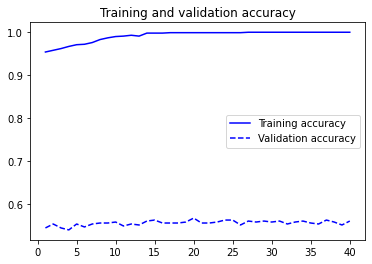

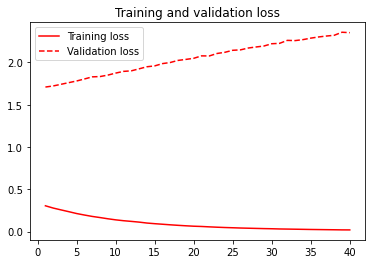

In [45]:
# plot accuracy and loss

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

# accuracy

plt.plot(epochs, acc, "b", label="Training accuracy")
plt.plot(epochs, val_acc, "b--", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

# loss

plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "r--", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### The Result 

> **After training for 10 epochs, the model was able to reach 100% accuracy on training set and near 100% on the validation set.**